In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [59]:
# Loading Dataset
df = pd.read_csv('data.csv')

In [5]:
# Checking Output Value Count
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

##### Checking Dataset

In [7]:
# Checking Null Value
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
# Checking Duplicate Value
df.duplicated().sum()

np.int64(0)

In [9]:
# Checking DataType
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

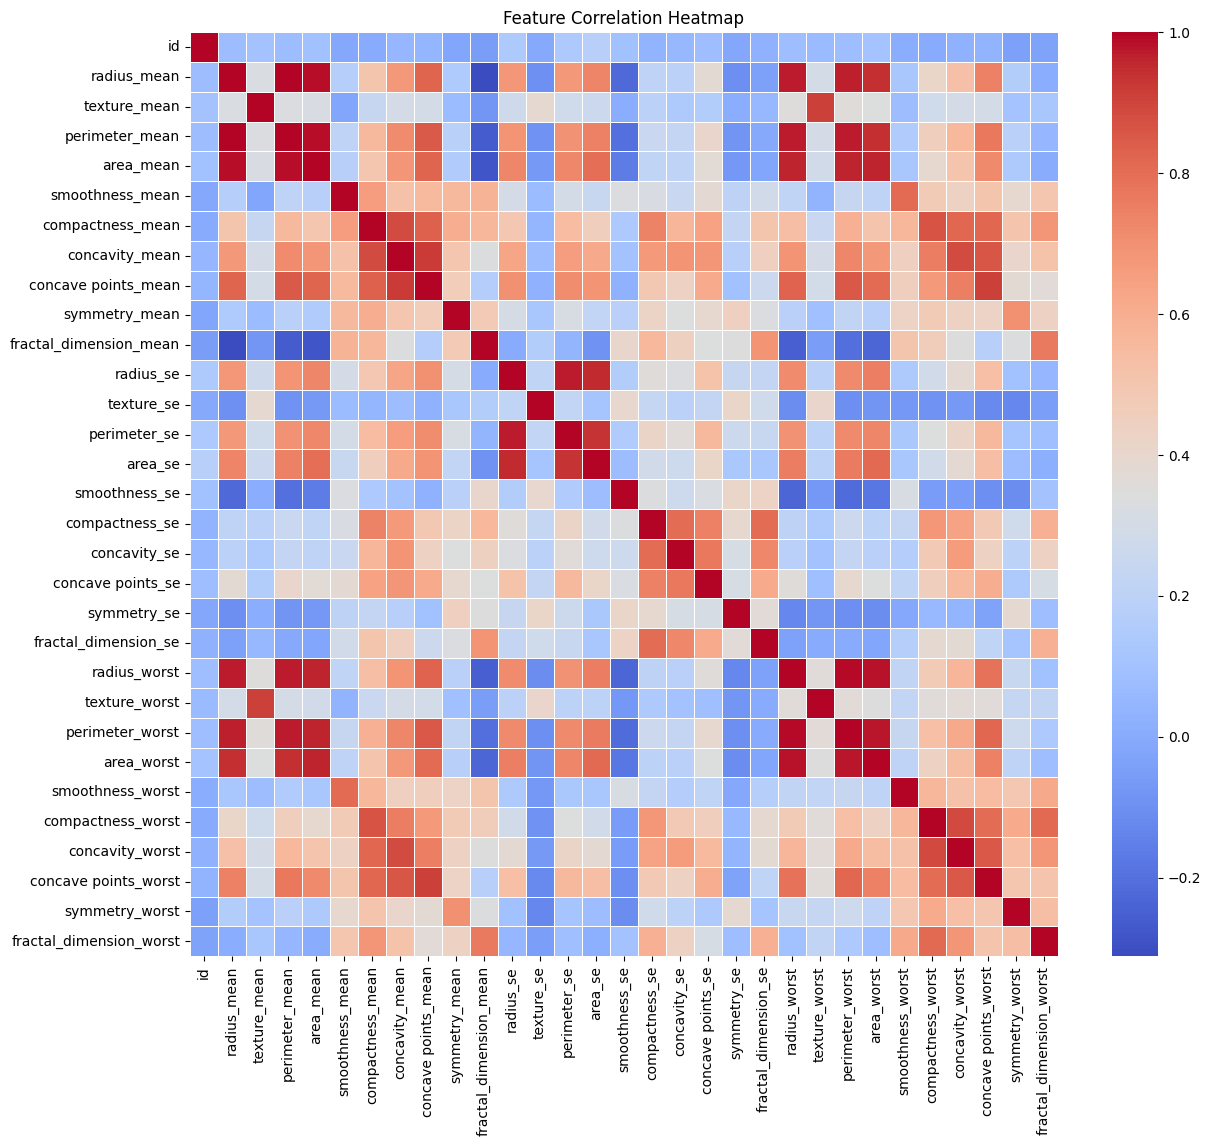

In [60]:
# Checking Correlation Heatmap
plt.figure(figsize=(14, 12))
corr_matrix = df.drop(columns=['diagnosis']).corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

The heatmap shows pairwise correlations between all 30 numeric features.

Dark red = high positive correlation, dark blue = high negative correlation.

##### Encoding the Target

In [61]:
# Malignant as 1 and Benign as 0
df['diagnosis'] = df['diagnosis'].map({'M':1, "B":0})

##### Splitting Training and Test Dataset

In [62]:
x = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [63]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 42
)

##### Feature Scaling

In [64]:
# Standard Scaler
sc = StandardScaler()

# Fitting Training Data
sc.fit(x_train)

StandardScaler()

In [65]:
# Transform
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

##### Logistic Regression

In [73]:
# Logistic Regression
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_pred = lg.predict(x_test)
acc= accuracy_score(y_test, y_pred)
print(f"Logistic Regression: {acc:.4f}")

Logistic Regression: 0.9737


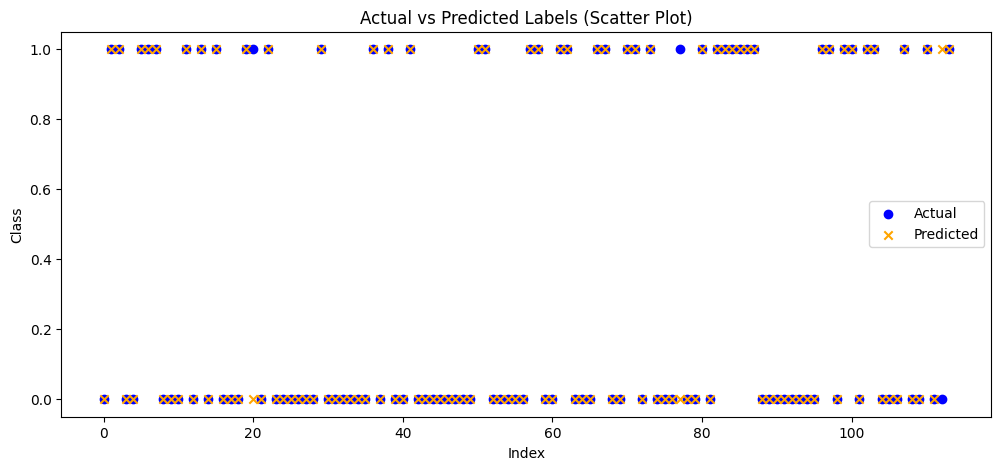

In [43]:
# Plotting Actual and Predicted Datapoints
plt.figure(figsize=(12, 5))

# Plot actual values
plt.scatter(range(len(y_test)), y_test, label='Actual', marker='o', color='blue')
# Plot predicted values
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', marker='x', color='orange')

plt.title('Actual vs Predicted Labels (Scatter Plot)')
plt.xlabel('Index')
plt.ylabel('Class')
plt.legend()
plt.show()

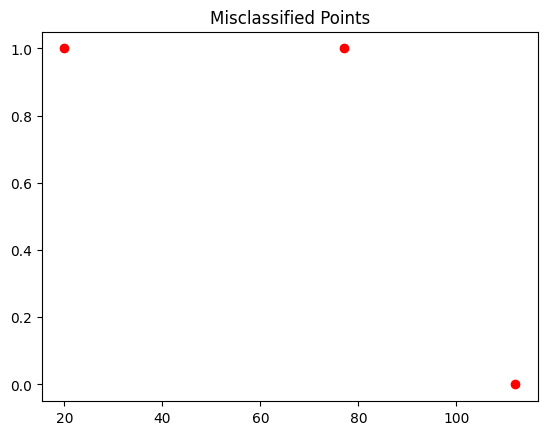

In [67]:
# Plotting Misclassified Datapoints
misclassified = y_test != y_pred
plt.scatter(np.where(misclassified), y_test[misclassified], color = 'red', label = 'Misclassified')
plt.title("Misclassified Points")
plt.show()

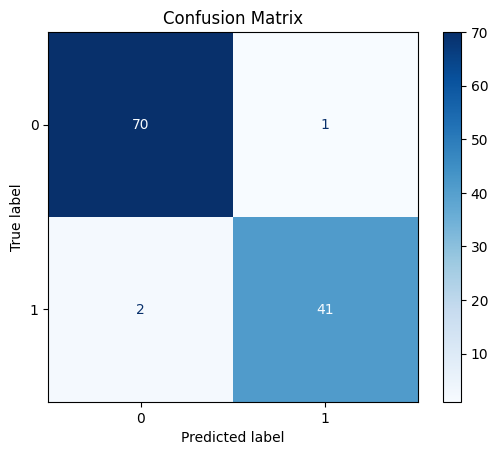

In [68]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

✅ True Negatives (70): Benign correctly predicted

✅ True Positives (41): Malignant correctly predicted

❌ False Positives (1): Benign misclassified as malignant

❌ False Negatives (2): Malignant misclassified as benign

🔍 High accuracy and balanced performance

In [74]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [75]:
# Cross Validation
scores = cross_val_score(LogisticRegression(), x_train, y_train, cv=5)
print(f"Cross-Validated Accuracy: {scores.mean():.4f}")

Cross-Validated Accuracy: 0.9736


##### SVM

In [98]:
# SVM
support_vm = SVC()
support_vm.fit(x_train, y_train)
y_pred = support_vm.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"SVM: {acc:.4f}")

SVM: 0.9825


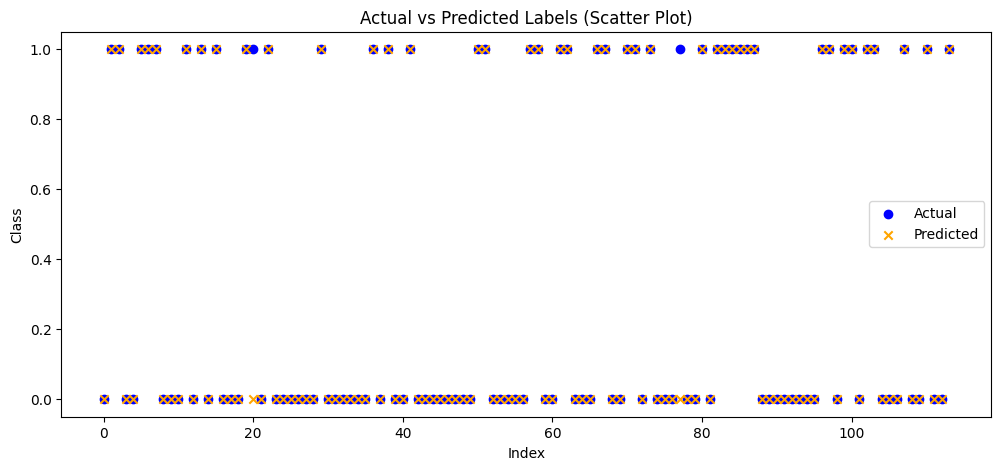

In [99]:
# Plotting Actual and Predicted Datapoints
plt.figure(figsize=(12, 5))

# Plot actual values
plt.scatter(range(len(y_test)), y_test, label='Actual', marker='o', color='blue')
# Plot predicted values
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', marker='x', color='orange')

plt.title('Actual vs Predicted Labels (Scatter Plot)')
plt.xlabel('Index')
plt.ylabel('Class')
plt.legend()
plt.show()

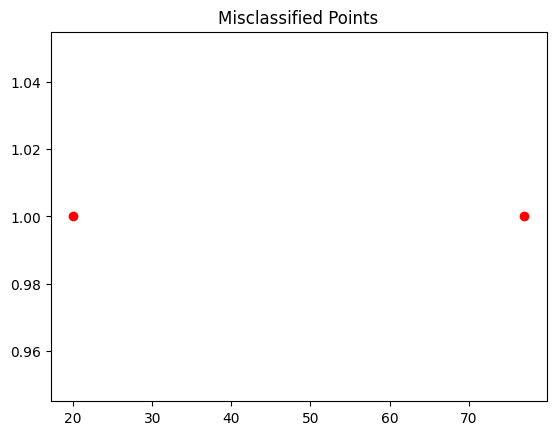

In [100]:
# Plotting Misclassified Datapoints
misclassified = y_test != y_pred
plt.scatter(np.where(misclassified), y_test[misclassified], color = 'red', label = 'Misclassified')
plt.title("Misclassified Points")
plt.show()

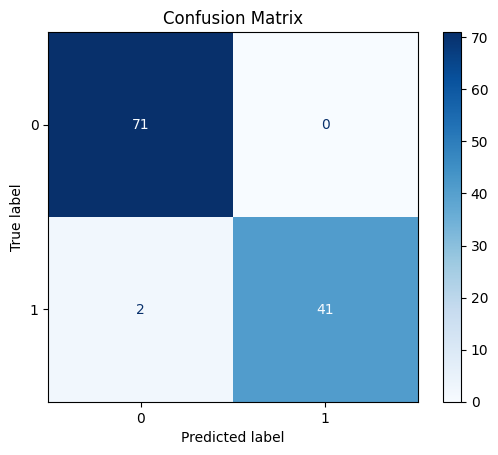

In [101]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

✅ True Negatives (71): All benign cases correctly predicted

✅ True Positives (41): Malignant cases correctly predicted

❌ False Negatives (2): Malignant misclassified as benign

✅ False Positives (0): No benign cases misclassified

🔍 Perfect precision, minimal false negatives

In [102]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [104]:
# Cross Validation
scores = cross_val_score(SVC(), x_train, y_train, cv=5)
print(f"Cross-Validated Accuracy: {scores.mean():.4f}")

Cross-Validated Accuracy: 0.9736


##### K-Nearest Neighbors

In [105]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"K-Nearest Neighbors: {acc:.4f}")

K-Nearest Neighbors: 0.9474


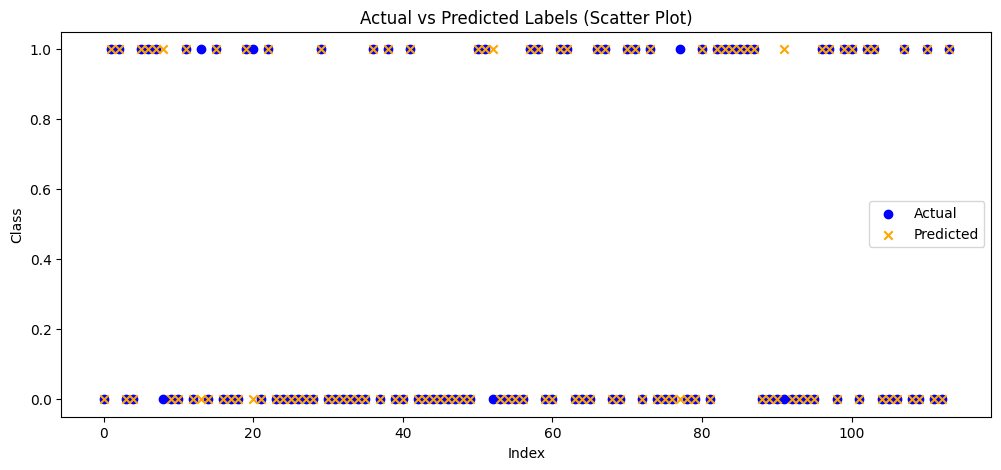

In [106]:
# Plotting Actual and Predicted Datapoints
plt.figure(figsize=(12, 5))

# Plot actual values
plt.scatter(range(len(y_test)), y_test, label='Actual', marker='o', color='blue')
# Plot predicted values
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', marker='x', color='orange')

plt.title('Actual vs Predicted Labels (Scatter Plot)')
plt.xlabel('Index')
plt.ylabel('Class')
plt.legend()
plt.show()

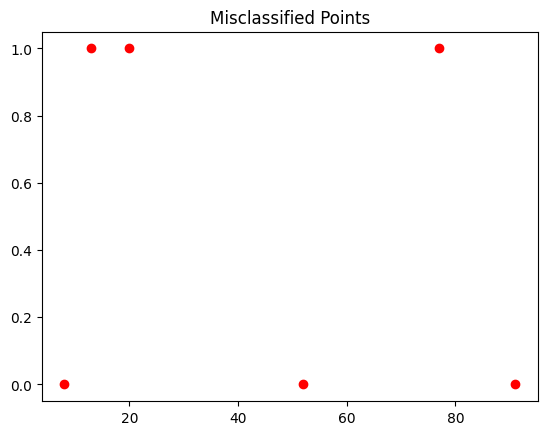

In [107]:
# Plotting Misclassified Datapoints
misclassified = y_test != y_pred
plt.scatter(np.where(misclassified), y_test[misclassified], color = 'red', label = 'Misclassified')
plt.title("Misclassified Points")
plt.show()

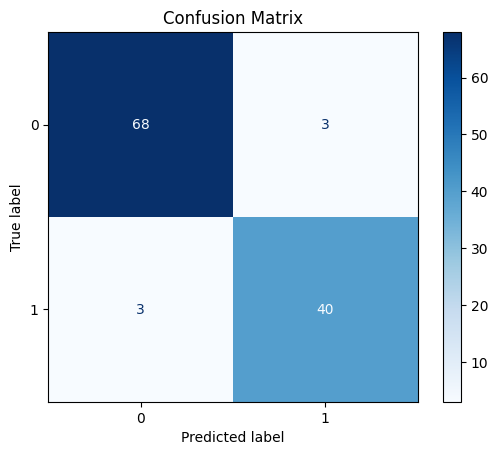

In [108]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

✅ True Negatives (68): Benign correctly predicted

✅ True Positives (40): Malignant correctly predicted

❌ False Positives (3): Benign misclassified as malignant

❌ False Negatives (3): Malignant misclassified as benign

⚖️ Balanced model, but slightly more misclassifications

In [109]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [110]:
# Cross Validation
scores = cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=5)
print(f"Cross-Validated Accuracy: {scores.mean():.4f}")

Cross-Validated Accuracy: 0.9626


##### Decision Tree

In [111]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"Decision Tree: {acc:.4f}")

Decision Tree: 0.9386


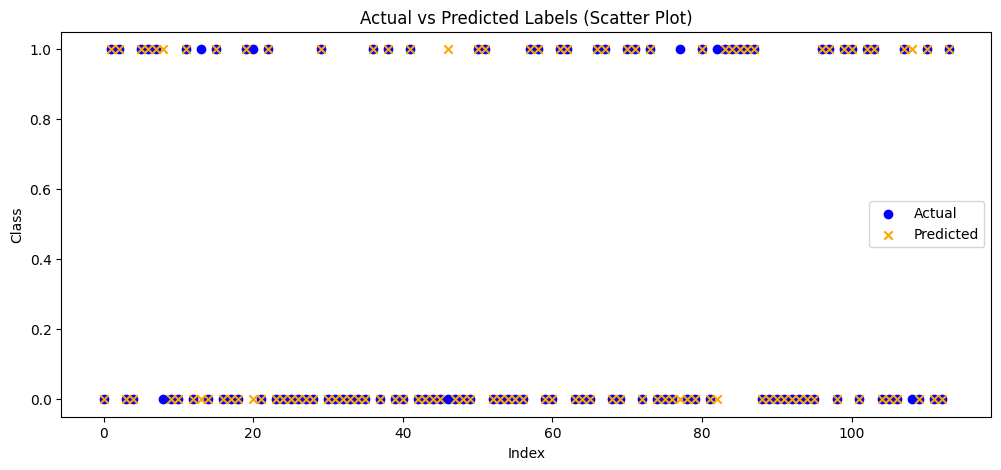

In [112]:
# Plotting Actual and Predicted Datapoints
plt.figure(figsize=(12, 5))

# Plot actual values
plt.scatter(range(len(y_test)), y_test, label='Actual', marker='o', color='blue')
# Plot predicted values
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', marker='x', color='orange')

plt.title('Actual vs Predicted Labels (Scatter Plot)')
plt.xlabel('Index')
plt.ylabel('Class')
plt.legend()
plt.show()

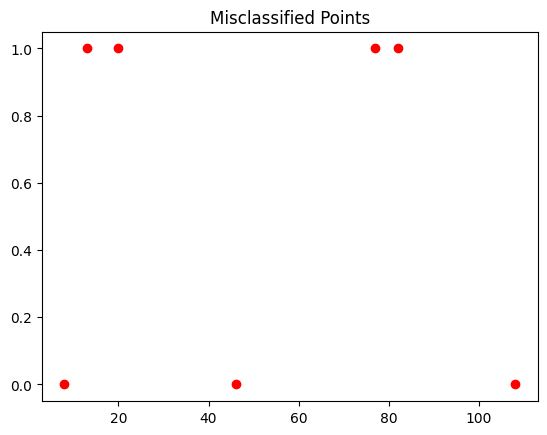

In [113]:
# Plotting Misclassified Datapoints
misclassified = y_test != y_pred
plt.scatter(np.where(misclassified), y_test[misclassified], color = 'red', label = 'Misclassified')
plt.title("Misclassified Points")
plt.show()

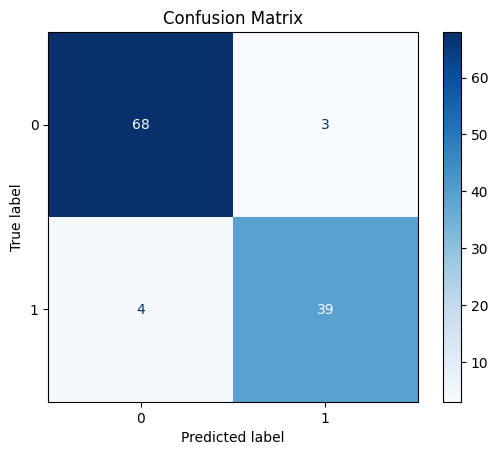

In [114]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

✅ True Negatives (68): Benign correctly predicted

✅ True Positives (39): Malignant correctly predicted

❌ False Positives (3): Benign misclassified as malignant

❌ False Negatives (4): Malignant misclassified as benign

⚠️ Slight drop in recall due to more false negatives

In [115]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [116]:
# Cross Validation
scores = cross_val_score(DecisionTreeClassifier(), x_train, y_train, cv=5)
print(f"Cross-Validated Accuracy: {scores.mean():.4f}")

Cross-Validated Accuracy: 0.9253


##### Random Forest

In [117]:
# Decision Tree
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest: {acc:.4f}")

Random Forest: 0.9649


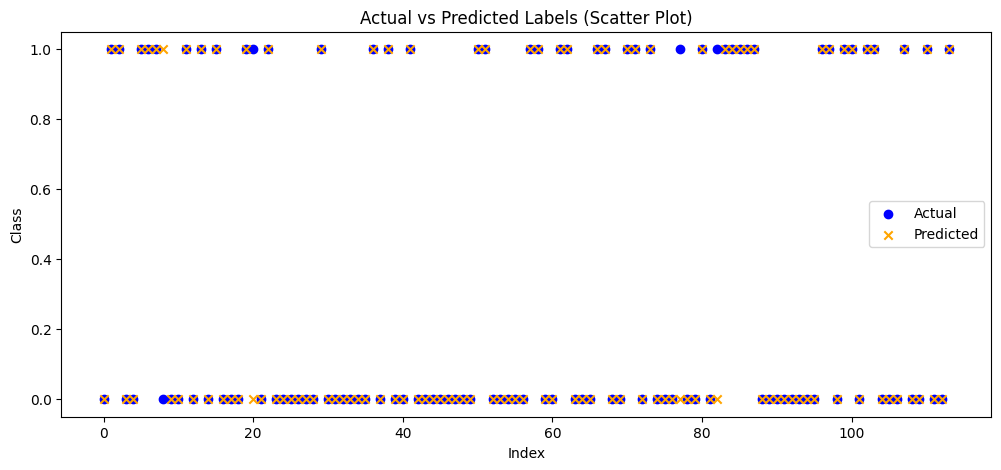

In [118]:
# Plotting Actual and Predicted Datapoints
plt.figure(figsize=(12, 5))

# Plot actual values
plt.scatter(range(len(y_test)), y_test, label='Actual', marker='o', color='blue')
# Plot predicted values
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', marker='x', color='orange')

plt.title('Actual vs Predicted Labels (Scatter Plot)')
plt.xlabel('Index')
plt.ylabel('Class')
plt.legend()
plt.show()

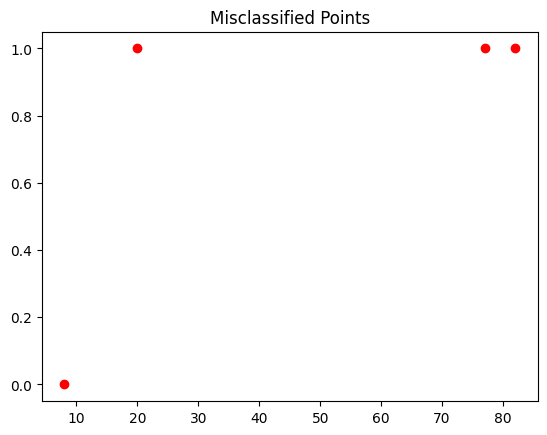

In [119]:
# Plotting Misclassified Datapoints
misclassified = y_test != y_pred
plt.scatter(np.where(misclassified), y_test[misclassified], color = 'red', label = 'Misclassified')
plt.title("Misclassified Points")
plt.show()

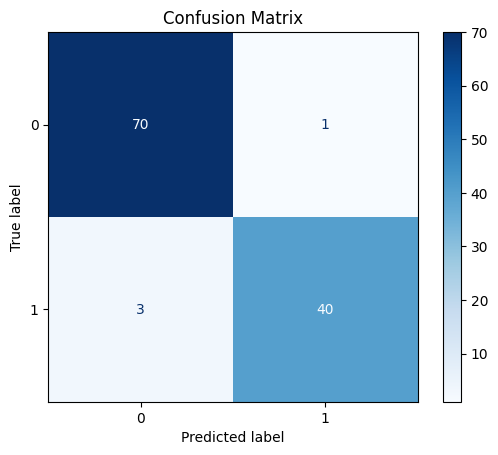

In [120]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

✅ True Negatives (70): Benign correctly predicted

✅ True Positives (40): Malignant correctly predicted

❌ False Positives (1): Benign misclassified as malignant

❌ False Negatives (3): Malignant misclassified as benign

🔍 Strong performance with minimal misclassifications

In [121]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [122]:
# Cross Validation
scores = cross_val_score(RandomForestClassifier(), x_train, y_train, cv=5)
print(f"Cross-Validated Accuracy: {scores.mean():.4f}")

Cross-Validated Accuracy: 0.9582


##### Gradient Boosting

In [123]:
# Decision Tree
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting: {acc:.4f}")

Gradient Boosting: 0.9474


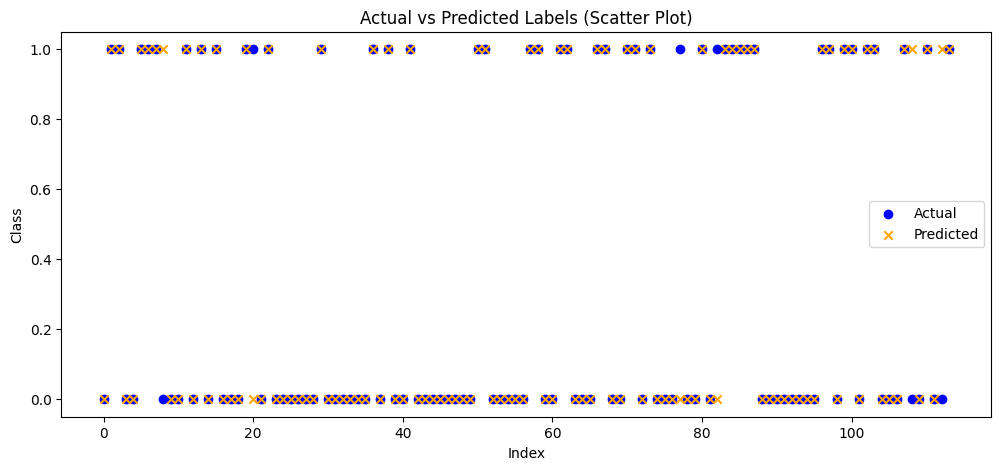

In [124]:
# Plotting Actual and Predicted Datapoints
plt.figure(figsize=(12, 5))

# Plot actual values
plt.scatter(range(len(y_test)), y_test, label='Actual', marker='o', color='blue')
# Plot predicted values
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', marker='x', color='orange')

plt.title('Actual vs Predicted Labels (Scatter Plot)')
plt.xlabel('Index')
plt.ylabel('Class')
plt.legend()
plt.show()

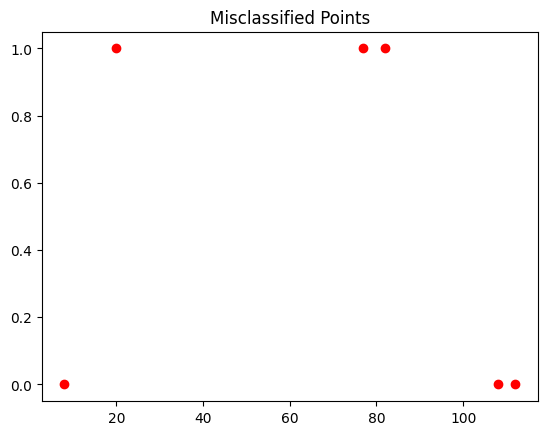

In [125]:
# Plotting Misclassified Datapoints
misclassified = y_test != y_pred
plt.scatter(np.where(misclassified), y_test[misclassified], color = 'red', label = 'Misclassified')
plt.title("Misclassified Points")
plt.show()

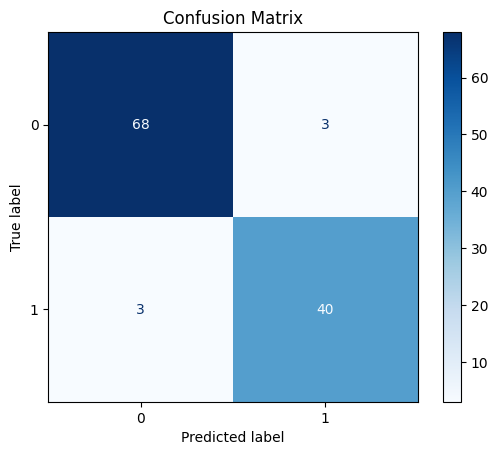

In [126]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

✅ True Negatives (68): Benign correctly predicted

✅ True Positives (40): Malignant correctly predicted

❌ False Positives (3): Benign misclassified as malignant

❌ False Negatives (3): Malignant misclassified as benign

⚖️ Balanced model, with equal false positive and false negative rates

In [127]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [128]:
# Cross Validation
scores = cross_val_score(GradientBoostingClassifier(), x_train, y_train, cv=5)
print(f"Cross-Validated Accuracy: {scores.mean():.4f}")

Cross-Validated Accuracy: 0.9538
